In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import Birch
from ipywidgets import interactive

## My Dataset

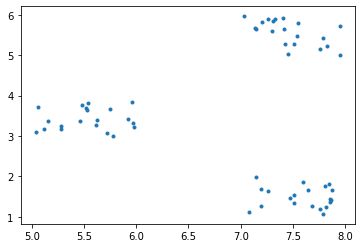

In [22]:
rng = np.random.default_rng(seed=1)
x = 7 + rng.random(20)
x = np.append(x, 5 + rng.random(20))
x = np.append(x, 7 + rng.random(20))
y = 5 + rng.random(20)
y = np.append(y, 3 + rng.random(20))
y = np.append(y, 1 + rng.random(20))
plt.plot(x, y, '.')

data = np.stack((x, y), axis=1)
data_1D = np.append(x, y)
# print(data)

# Manual K-Means

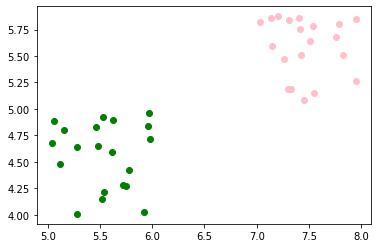

In [3]:
# cog = center of gravity
# cs = center of gravities
# k = k cluster

# Evaluate k
ks = np.arange(0, 15)
# Gib die Anzhal der zu erwartenden Cluster an
ks = [2]

# für jedes Cluster
for k in ks:
    # definiere die ersten zwei Datenpunkte als Startpunkte
    cs = data[0:k].copy()
    
    terminate = False
    # Deklariere last_cog
    last_cog = [np.array([0, 0]) for i in range(k)]
    while not terminate:
        # berechne alle Distanzen zwischen Datenpunkten und cs
        dist = np.stack([[np.linalg.norm(c-d) for d in data] for c in cs], axis=1)
        # finde die kleinste Distanz eines Datenpunkts zu den cs und gebe das dazugehörige Cluster in einen Array
        z = np.array([np.argmin(d) for d in dist])
        # i ist von 0 bis k und wenn z gleich 0 ist gehört der Datenpunkt dem nullten Cluster an,
        # bei eins, dem ersten und so weiter. So besteht df aus einem Array mit Unterarrays mit Datenpukten der einzelnen Cluster
        df = [data[z == i] for i in range(k)]
        # berechne die neuen Schwerpunkte
        current_cog = [np.sum(d, axis=0)/len(d) for d in df]
        # berechne die Differenz zwischen dem aktuellen und dem letzten cog
        diff_cog = np.sum(np.abs([last - current for last, current in zip(last_cog, current_cog)]))
        # setzte den letzten cog auf den aktuellen
        last_cog = current_cog
        #print(diff_cog)
        # setze den neuen Startpunkt auf den aktuellen cog
        cs = current_cog
        # wenn die Differenz unter einer gewissen Schwelle ist, beende den Algorithmus
        if diff_cog < 0.3:
            terminate = True
            
plt.scatter(df[0][:, 0], df[0][:, 1], color='green')
plt.scatter(df[1][:, 0], df[1][:, 1], color='pink')

# print(current_cog)

# Animated K-Means

In [43]:
%matplotlib inline
import random
def kmeans(step=1):
    cur_steps = 0
    ks = np.arange(0, 15)
    ks = [3]

    # für jedes Cluster
    for k in ks:
        cs = data[0:k].copy()

        last_cog = [np.array([0, 0]) for i in range(k)]
        while cur_steps < step:
            dist = np.stack([[np.linalg.norm(c-d) for d in data] for c in cs], axis=1)
            z = np.array([np.argmin(d) for d in dist])
            df = [data[z == i] for i in range(k)]
            current_cog = [np.sum(d, axis=0)/len(d) for d in df]
            diff_cog = np.sum(np.abs([last - current for last, current in zip(last_cog, current_cog)]))
            last_cog = current_cog
            cs = current_cog
            cur_steps += 1
            
    for i in range(ks[0]):
        plt.scatter(df[i][:, 0], df[i][:, 1])
    cs = np.squeeze(cs)
    plt.plot(cs[:, 0], cs[:, 1], 'bo')
    
interactive(kmeans, step=(1, 10))

interactive(children=(IntSlider(value=1, description='step', max=10, min=1), Output()), _dom_classes=('widget-…

# K-Means with Scikit-Learn

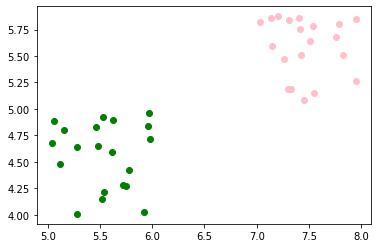

In [16]:
km = KMeans(n_clusters=2)
data_predicted = km.fit_predict(data)

df1 = data[data_predicted == 0]
df2 = data[data_predicted == 1]
#print(df2)
plt.scatter(df1[:, 0], df1[:, 1], color='green')
plt.scatter(df2[:, 0], df2[:, 1], color='pink')

# BIRCH with Scikit-Learn

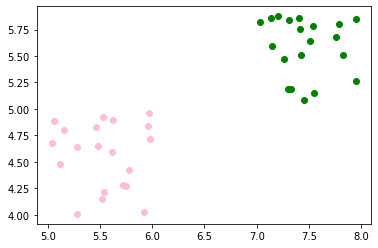

In [17]:
brc = Birch(n_clusters=None)
brc.fit(data)
data_predicted = brc.predict(data)

# 
df1 = data[data_predicted == 0]
df2 = data[data_predicted == 1]
#print(df2)
plt.scatter(df1[:, 0], df1[:, 1], color='green')
plt.scatter(df2[:, 0], df2[:, 1], color='pink')